<a href="https://colab.research.google.com/github/nurayyubov/GitHub-repos/blob/main/b_cancer_hw_nur.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [4]:
bcancer = datasets.load_breast_cancer(as_frame=True)
df = bcancer.frame
df.sample(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
82,25.22,24.91,171.50,1878.0,0.10630,0.26650,0.333900,0.184500,0.1829,0.06782,...,33.62,211.70,2562.0,0.15730,0.60760,0.647600,0.286700,0.2355,0.10510,0
165,14.97,19.76,95.50,690.2,0.08421,0.05352,0.019470,0.019390,0.1515,0.05266,...,25.82,102.30,782.1,0.10450,0.09995,0.077500,0.057540,0.2646,0.06085,1
178,13.01,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,0.1395,0.05234,...,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843,1
25,17.14,16.40,116.00,912.7,0.11860,0.22760,0.222900,0.140100,0.3040,0.07413,...,21.40,152.40,1461.0,0.15450,0.39490,0.385300,0.255000,0.4066,0.10590,0
79,12.86,18.00,83.19,506.3,0.09934,0.09546,0.038890,0.023150,0.1718,0.05997,...,24.82,91.88,622.1,0.12890,0.21410,0.173100,0.079260,0.2779,0.07918,1


In [8]:
#mean radius
data_list = df['mean radius'].values.tolist()
data_array = df['mean radius'].values
data_frame = df['mean radius']

**Mean**

In [9]:
data_array.mean()

np.float64(14.127291739894552)

**Median**

In [12]:
data_frame.median()

13.37

**CDF**

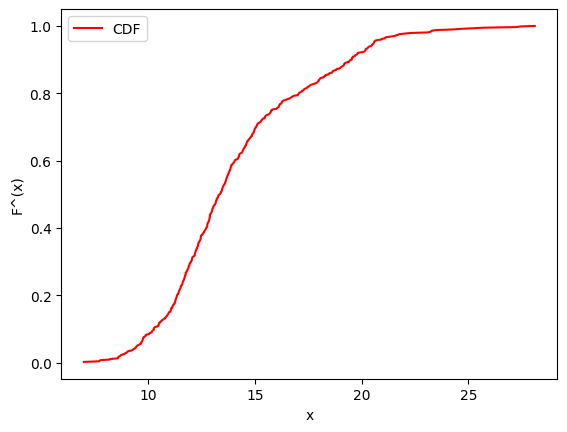

In [15]:
def calculate_cdf(data_list):
    sorted_data = sorted(data_list)
    cdf = np.arange(1, len(sorted_data)+1) / len(sorted_data)
    return sorted_data, cdf

x, y = calculate_cdf(data_list)
plt.plot(x, y, label = 'CDF', color='red')
plt.xlabel('x')
plt.ylabel('F^(x)')
plt.legend()

inverse cdf


In [39]:
def quartiles(data_list):
  q0 = data_list[0]
  q1 = data_list[int(len(data_list)/4)]
  q2 = data_list[int(len(data_list)/2)]
  q3 = data_list[int(3*len(data_list)/4)]
  q4 = data_list[-1]
  return q0, q1, q2, q3, q4
q = quartiles(x)
q


(6.981, 11.7, 13.37, 15.78, 28.11)

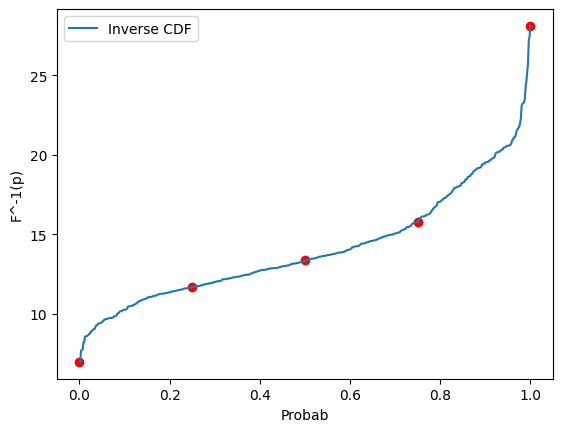

In [40]:
# inverse CDF
plt.plot(y, x, label='Inverse CDF')
plt.scatter([0, 0.25, 0.5, 0.75, 1], q, color='r') # 0.5

# plot.plot()
plt.xlabel('Probab')
plt.ylabel('F^-1(p)')
plt.legend()

In [42]:
IQR = q[3] - q[1]
IQR

4.08

**outlier**

In [44]:
lessmin = df[df['mean radius'] < q[1] - 1.5*IQR]
moremax = df[df['mean radius'] > q[3] + 1.5*IQR]
print(lessmin.shape)
print(moremax.shape)

(0, 31)
(14, 31)


**mode**

In [46]:
import statistics as st
st.mode(data_list)


4

**variance**

In [52]:
def variance(array):
  mean = array.mean()
  farq = (array-mean)**2
  var = farq.sum()/len(array)
  return var
var_result = variance(data_array)
var_result

np.float64(12.397094259351807)

Standart **deviation**

In [54]:
sd = np.sqrt(var_result)
sd

np.float64(3.520950760711062)